In [1]:
import keras
import tensorflow as tf
import os
import numpy as np
from numpy import expand_dims
import pandas as pd
import glob
import cv2

from keras.datasets import cifar10
from keras import layers
from keras import optimizers
from keras.regularizers import l1
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import  img_to_array, load_img
from keras.preprocessing import image
from keras.models import Sequential
from keras import models
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, Adam

import matplotlib.pyplot as plt
import matplotlib.image as mpimg # mpimg 用於讀取圖片

from sklearn.model_selection import train_test_split

from PIL import Image

Using TensorFlow backend.


In [47]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
batch_size = 80 # batch 的大小，如果出現 OOM error，請降低這個值
num_classes = 2 # 類別的數量，Cifar 10 共有 10 個類別
epochs = 250 # 訓練的 epochs 數量

In [16]:
dict_labels = {"cats":1, "dogs":0}
size = (64,64)
nbofdata = 2000

for folders in glob.glob("kaggle_dogcat/train/*"):
    print(folders)
    images=[]
    labels_hot=[]
    labels=[]
    nbofdata_i=1
    for filename in os.listdir(folders):
        if nbofdata_i <= nbofdata:
                    label = os.path.basename(folders)
                    className = np.asarray(label)
                    img = load_img(os.path.join(folders,filename))
                    img = img.resize(size,Image.BILINEAR)
                    if img is not None:
                        if label is not None:
                            labels.append(className)
                            labels_hot.append(dict_labels[label])
                        x = img_to_array(img)
                        images.append(x)
                    nbofdata_i+=1
    images=np.array(images)    
    labels_hot=np.array(labels_hot)
    print("images.shape={}, labels_hot.shape=={}".format(images.shape, labels_hot.shape))    
    imagesavepath='Cat_Dog_Dataset/'
    if not os.path.exists(imagesavepath):
        os.makedirs(imagesavepath)
    # Save
    np.save(imagesavepath+'{}_images.npy'.format(label),images)    
    np.save(imagesavepath+'{}_label.npy'.format(label),labels)    
    np.save(imagesavepath+'{}_labels_hot.npy'.format(label),labels_hot)
    print('{} files has been saved.'.format(label))
    
# from : 默默地學 Deep Learning (3)-貓狗資料集

kaggle_dogcat/train\cats
images.shape=(2000, 64, 64, 3), labels_hot.shape==(2000,)
cats files has been saved.
kaggle_dogcat/train\dogs
images.shape=(2000, 64, 64, 3), labels_hot.shape==(2000,)
dogs files has been saved.


In [17]:
images_all = []
labels_all = []

# Read cat npy file
images_cat = np.load('Cat_Dog_Dataset/cats_images.npy')
images_all = images_cat
labels_cat = np.load('Cat_Dog_Dataset/cats_labels_hot.npy')
labels_all = labels_cat

# Read dog npy file
images_dog = np.load('Cat_Dog_Dataset/dogs_images.npy')
images_all = np.append(images_all,images_dog,axis=0)

labels_dog = np.load('Cat_Dog_Dataset/dogs_labels_hot.npy')
labels_all = np.append(labels_all,labels_dog,axis=0)
len(labels_all)

# from : 默默地學 Deep Learning (3)-貓狗資料集

4000

In [18]:
x_train, x_val, y_train, y_val = train_test_split(images_all, labels_all, test_size=0.1, random_state=0)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print('\n')
print('x_val shape:', x_val.shape)
print(x_val.shape[0], 'val samples')

x_train shape: (3600, 64, 64, 3)
3600 train samples


x_val shape: (400, 64, 64, 3)
400 val samples


In [19]:
x_train = x_train.astype('float32') /255
x_val = x_val.astype('float32') / 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

[0. 1.]


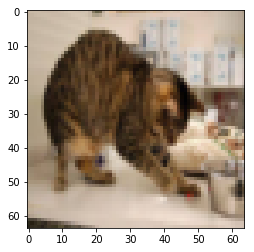

In [20]:
ex = x_train[12]
print(y_train[12])
plt.imshow((ex*255).astype(np.uint8))
plt.show()

In [48]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
activation_41 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_42 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 31, 31, 64)        18496     
__________

In [49]:
from keras.callbacks import EarlyStopping , ReduceLROnPlateau

earlystop = EarlyStopping( monitor = 'val_loss', 
                           patience = 16, 
                           verbose = 1)

lr_Reduce = ReduceLROnPlateau(monitor = 'val_loss', 
                              patience = 6,
                              verbose = 1,
                              factor = 0.5,
                              min_lr = 0.00001)

In [50]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Train on 3600 samples, validate on 400 samples
Epoch 1/250
3600/3600 [==============================] - 3s 743us/step - loss: 0.2509 - acc: 0.4850 - val_loss: 0.2501 - val_acc: 0.4925
Epoch 2/250
3600/3600 [==============================] - 2s 498us/step - loss: 0.2501 - acc: 0.5000 - val_loss: 0.2500 - val_acc: 0.4925
Epoch 3/250
3600/3600 [==============================] - 2s 478us/step - loss: 0.2499 - acc: 0.5039 - val_loss: 0.2499 - val_acc: 0.5075
Epoch 4/250
3600/3600 [==============================] - 2s 460us/step - loss: 0.2501 - acc: 0.5000 - val_loss: 0.2499 - val_acc: 0.5075
Epoch 5/250
3600/3600 [==============================] - 2s 473us/step - loss: 0.2499 - acc: 0.5039 - val_loss: 0.2499 - val_acc: 0.5500
Epoch 6/250
3600/3600 [==============================] - 2s 494us/step - loss: 0.2495 - acc: 0.5219 - val_loss: 0.2500 - val_acc: 0.5075
Epoch 7/250
3600/3600 [==============================] - 2s 461us/step - loss: 0.2494 - acc: 0.5319 - val_loss: 0.2498 - val_acc: 0

3600/3600 [==============================] - 2s 474us/step - loss: 0.1933 - acc: 0.7000 - val_loss: 0.2358 - val_acc: 0.6225
Epoch 61/250
3600/3600 [==============================] - 2s 481us/step - loss: 0.1950 - acc: 0.7089 - val_loss: 0.2197 - val_acc: 0.6500
Epoch 62/250
3600/3600 [==============================] - 2s 478us/step - loss: 0.1919 - acc: 0.7083 - val_loss: 0.2294 - val_acc: 0.6500
Epoch 63/250
3600/3600 [==============================] - 2s 486us/step - loss: 0.1907 - acc: 0.7106 - val_loss: 0.2232 - val_acc: 0.6625
Epoch 64/250
3600/3600 [==============================] - 2s 476us/step - loss: 0.1942 - acc: 0.7122 - val_loss: 0.2097 - val_acc: 0.6650
Epoch 65/250
3600/3600 [==============================] - 2s 465us/step - loss: 0.1856 - acc: 0.7244 - val_loss: 0.2325 - val_acc: 0.6575
Epoch 66/250
3600/3600 [==============================] - 2s 469us/step - loss: 0.1855 - acc: 0.7236 - val_loss: 0.2482 - val_acc: 0.6200
Epoch 67/250
3600/3600 [=======================

3600/3600 [==============================] - 2s 486us/step - loss: 0.1319 - acc: 0.8117 - val_loss: 0.1781 - val_acc: 0.7325
Epoch 120/250
3600/3600 [==============================] - 2s 473us/step - loss: 0.1301 - acc: 0.8206 - val_loss: 0.1645 - val_acc: 0.7650
Epoch 121/250
3600/3600 [==============================] - 2s 472us/step - loss: 0.1295 - acc: 0.8197 - val_loss: 0.1544 - val_acc: 0.7775
Epoch 122/250
3600/3600 [==============================] - 2s 468us/step - loss: 0.1328 - acc: 0.8125 - val_loss: 0.1688 - val_acc: 0.7650
Epoch 123/250
3600/3600 [==============================] - 2s 474us/step - loss: 0.1311 - acc: 0.8178 - val_loss: 0.2035 - val_acc: 0.7100
Epoch 124/250
3600/3600 [==============================] - 2s 476us/step - loss: 0.1283 - acc: 0.8178 - val_loss: 0.1531 - val_acc: 0.7825
Epoch 125/250
3600/3600 [==============================] - 2s 493us/step - loss: 0.1272 - acc: 0.8231 - val_loss: 0.1692 - val_acc: 0.7450
Epoch 126/250
3600/3600 [================

3600/3600 [==============================] - 2s 460us/step - loss: 0.0769 - acc: 0.8978 - val_loss: 0.1481 - val_acc: 0.8075
Epoch 179/250
3600/3600 [==============================] - 2s 471us/step - loss: 0.0799 - acc: 0.8956 - val_loss: 0.1415 - val_acc: 0.8025
Epoch 180/250
3600/3600 [==============================] - 2s 494us/step - loss: 0.0768 - acc: 0.8969 - val_loss: 0.1341 - val_acc: 0.8275
Epoch 181/250
3600/3600 [==============================] - 2s 459us/step - loss: 0.0774 - acc: 0.8953 - val_loss: 0.1436 - val_acc: 0.8025
Epoch 182/250
3600/3600 [==============================] - 2s 468us/step - loss: 0.0787 - acc: 0.8942 - val_loss: 0.1465 - val_acc: 0.8050
Epoch 183/250
3600/3600 [==============================] - 2s 459us/step - loss: 0.0841 - acc: 0.8853 - val_loss: 0.1423 - val_acc: 0.8100
Epoch 184/250
3600/3600 [==============================] - 2s 475us/step - loss: 0.0746 - acc: 0.9014 - val_loss: 0.1399 - val_acc: 0.8300
Epoch 185/250
3600/3600 [================

3600/3600 [==============================] - 2s 492us/step - loss: 0.0448 - acc: 0.9408 - val_loss: 0.1412 - val_acc: 0.8150
Epoch 238/250
3600/3600 [==============================] - 2s 499us/step - loss: 0.0485 - acc: 0.9369 - val_loss: 0.1275 - val_acc: 0.8450
Epoch 239/250
3600/3600 [==============================] - 2s 475us/step - loss: 0.0459 - acc: 0.9392 - val_loss: 0.1393 - val_acc: 0.8300
Epoch 240/250
3600/3600 [==============================] - 2s 454us/step - loss: 0.0463 - acc: 0.9389 - val_loss: 0.1322 - val_acc: 0.8325
Epoch 241/250
3600/3600 [==============================] - 2s 462us/step - loss: 0.0429 - acc: 0.9431 - val_loss: 0.1374 - val_acc: 0.8325
Epoch 242/250
3600/3600 [==============================] - 2s 470us/step - loss: 0.0462 - acc: 0.9400 - val_loss: 0.1366 - val_acc: 0.8300
Epoch 243/250
3600/3600 [==============================] - 2s 480us/step - loss: 0.0472 - acc: 0.9369 - val_loss: 0.1387 - val_acc: 0.8325
Epoch 244/250
3600/3600 [================

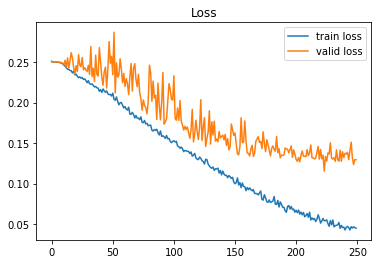

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

In [52]:
# model = tf.contrib.keras.models.load_model('my_model.h5')

score = model.evaluate(x_val, y_val, verbose=0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.12947054490447044
Val accuracy: 0.8425


In [53]:
Predicted = []

for i in range(400):
    path = 'kaggle_dogcat/test/'
    if i >=0 and i <10:
        path = path + '00' + str(i) + '.jpg'
    if i >=10 and i <100:
        path = path + '0' + str(i) + '.jpg'
    if i >=100 and i <400:
        path = path + str(i) + '.jpg'
    img = image.load_img(path, target_size=(64, 64))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x.astype('float32') /255
    #x = preprocess_input(x)
    #print(x)
    y_pred = model.predict(x)[:,1]
    #print(images)
    tmp = float(y_pred)
    Predicted.append(tmp)
    #plt.imshow(img)
    #plt.show()

In [54]:
num = []

for i in range(400):
    num.append(i)

In [56]:
ans = {'ID':num,'Predicted':Predicted}
fialExam = pd.DataFrame(ans)
print(fialExam)
fialExam.to_csv('fial exam_CNN_SGD_250.csv',index = False)

      ID     Predicted
0      0  8.325930e-03
1      1  9.967392e-01
2      2  9.967095e-01
3      3  8.359758e-09
4      4  9.649952e-01
5      5  9.615328e-01
6      6  9.513608e-01
7      7  5.639872e-01
8      8  9.964693e-01
9      9  9.985924e-01
10    10  3.599380e-02
11    11  9.981288e-01
12    12  1.467849e-02
13    13  9.914218e-01
14    14  2.672331e-01
15    15  9.673081e-01
16    16  6.302977e-08
17    17  9.947926e-01
18    18  8.183511e-01
19    19  9.973063e-01
20    20  9.923738e-01
21    21  9.669400e-01
22    22  9.738156e-01
23    23  9.993994e-01
24    24  9.929416e-01
25    25  4.479055e-02
26    26  4.559451e-01
27    27  1.179423e-05
28    28  4.785931e-05
29    29  5.257127e-02
..   ...           ...
370  370  6.256364e-01
371  371  6.185748e-03
372  372  9.868243e-01
373  373  9.907855e-01
374  374  9.968697e-01
375  375  6.735902e-02
376  376  9.951364e-01
377  377  7.944600e-01
378  378  8.857583e-01
379  379  8.920239e-01
380  380  2.570998e-05
381  381  3